# Phylum composition of biome specific clusters

All of these codes should be rerun after the taxonomy assignment issue is resolved

### Thermal Springs

In [1]:
import pandas as pd

df = pd.read_csv("../30_biome_specific/Thermal_afesm30_nBiomeGe10_lca.tsv", header=None,\
                 names=['repId', 'lcaId', 'lcaRank', 'lcaName'], delimiter='\t')

df.head()

,repId,lcaId,lcaRank,lcaName
0,AF-A0A2T9X9L4-F1-model_v4,131567,no rank,cellular organisms
1,AF-C3NE12-F1-model_v4,1,no rank,root
2,AF-C3NEY6-F1-model_v4,4137873,family,Sulfolobaceae
3,AF-Q4J7J8-F1-model_v4,4137873,family,Sulfolobaceae
4,AF-A0A4D8RU60-F1-model_v4,4137872,order,Sulfolobales


In [2]:
phylum_mapper = pd.read_csv("../coreness/grouping_w_merged_dmp_gtdb-taxId_taxName_phylumId_phylumName.tsv", header=None, \
                            names=['taxId', 'taxName', 'phylumId', 'phylumName'], delimiter='\t')

phylum_mapper.head()

,taxId,taxName,phylumId,phylumName
0,1224,Pseudomonadota,1224,Pseudomonadota
1,28211,Alphaproteobacteria,1224,Pseudomonadota
2,356,Hyphomicrobiales,1224,Pseudomonadota
3,335928,Xanthobacteraceae,1224,Pseudomonadota
4,6,Azorhizobium,1224,Pseudomonadota


In [3]:
superkingdom_mapper = pd.read_csv("../coreness/grouping_w_merged_dmp_gtdb-taxId_taxName_superkingdomId_superkingdomName.tsv", header=None, \
                            names=['taxId', 'taxName', 'superkingdomId', 'superkingdomName'], delimiter='\t')

superkingdom_mapper.head()

,taxId,taxName,superkingdomId,superkingdomName
0,2,Bacteria,2,Bacteria
1,1224,Pseudomonadota,2,Bacteria
2,28211,Alphaproteobacteria,2,Bacteria
3,356,Hyphomicrobiales,2,Bacteria
4,335928,Xanthobacteraceae,2,Bacteria


In [4]:
def phylum_mapping(x):
  if x in phylum_mapper['taxId'].values:
    if phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0] == 'Thermoproteota':
      return 'Thermoproteota'
    else:
      return 'others'
    # return phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1:
    return 'root'
  else:
    return 'others'
  
# print(phylum_mapper['taxId'].values)
phylum_df = df[ df['lcaRank'] == 'phylum']
df['phylum'] = df['lcaId'].apply(phylum_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum
0,AF-A0A2T9X9L4-F1-model_v4,131567,no rank,cellular organisms,others
1,AF-C3NE12-F1-model_v4,1,no rank,root,root
2,AF-C3NEY6-F1-model_v4,4137873,family,Sulfolobaceae,Thermoproteota
3,AF-Q4J7J8-F1-model_v4,4137873,family,Sulfolobaceae,Thermoproteota
4,AF-A0A4D8RU60-F1-model_v4,4137872,order,Sulfolobales,Thermoproteota


In [10]:
def superkingdom_mapping(x):
  if x in superkingdom_mapper['taxId'].values:
    return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
    # return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1 or 131567:
    return 'root'
  else:
    return 'others'
  
# print(superkingdom_mapper['taxId'].values)
superkingdom_df = df[ df['lcaRank'] == 'superkingdom']
df['superkingdom'] = df['lcaId'].apply(superkingdom_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum,superkingdom
0,AF-A0A2T9X9L4-F1-model_v4,131567,no rank,cellular organisms,others,root
1,AF-C3NE12-F1-model_v4,1,no rank,root,root,root
2,AF-C3NEY6-F1-model_v4,4137873,family,Sulfolobaceae,Thermoproteota,Archaea
3,AF-Q4J7J8-F1-model_v4,4137873,family,Sulfolobaceae,Thermoproteota,Archaea
4,AF-A0A4D8RU60-F1-model_v4,4137872,order,Sulfolobales,Thermoproteota,Archaea


In [13]:
values = df['superkingdom'].value_counts()
values

superkingdom
Archaea         456
root            126
unclassified    102
Bacteria         43
Viruses          17
Name: count, dtype: int64

In [14]:
sum(values)

744

In [15]:
values = values.reindex(['unclassified', 'root',  'Bacteria', 'Eukaryota', 'Archaea', 'Viruses', ])
values = values.fillna(0)

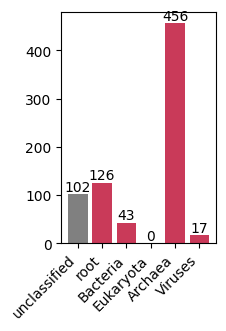

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 3))
obj = plt.bar(values.index, values.values, color=['gray'] + ['#C93A59'] * 5)
plt.bar_label(obj)
plt.xticks(rotation=45, ha='right')
# plt.legend()

plt.savefig('Thermal_spring_phylum.svg')

### Saline rich 

In [13]:
import pandas as pd

df = pd.read_csv("../../afesm5/taxonomy/gtdb_lca/Saline_afesm30_allMem_lca.tsv", header=None,\
                 names=['repId', 'lcaId', 'lcaRank', 'lcaName'], delimiter='\t')

df.head()

,repId,lcaId,lcaRank,lcaName
0,AF-A0A365THJ0-F1-model_v4,4137877,order,Halobacteriales
1,AF-A0A3M1Q0M8-F1-model_v4,4000002,superkingdom,Bacteria
2,AF-A0A1U7EXC0-F1-model_v4,4137877,order,Halobacteriales
3,AF-A0A1H8SQV7-F1-model_v4,1,no rank,root
4,AF-A0A345E4Q5-F1-model_v4,1,no rank,root


In [14]:
def phylum_mapping(x):
  if x in phylum_mapper['taxId'].values:
    if phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0] == 'Halobacteriota':
      return 'Halobacteriota'
    else:
      return 'others'
    # return phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1:
    return 'root'
  else:
    return 'others'
  
# print(phylum_mapper['taxId'].values)
phylum_df = df[ df['lcaRank'] == 'phylum']
df['phylum'] = df['lcaId'].apply(phylum_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum
0,AF-A0A365THJ0-F1-model_v4,4137877,order,Halobacteriales,Halobacteriota
1,AF-A0A3M1Q0M8-F1-model_v4,4000002,superkingdom,Bacteria,others
2,AF-A0A1U7EXC0-F1-model_v4,4137877,order,Halobacteriales,Halobacteriota
3,AF-A0A1H8SQV7-F1-model_v4,1,no rank,root,root
4,AF-A0A345E4Q5-F1-model_v4,1,no rank,root,root


In [15]:
def superkingdom_mapping(x):
  if x in superkingdom_mapper['taxId'].values:
    return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
    # return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1:
    return 'root'
  else:
    return 'others'
  
# print(superkingdom_mapper['taxId'].values)
superkingdom_df = df[ df['lcaRank'] == 'superkingdom']
df['superkingdom'] = df['lcaId'].apply(superkingdom_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum,superkingdom
0,AF-A0A365THJ0-F1-model_v4,4137877,order,Halobacteriales,Halobacteriota,Archaea
1,AF-A0A3M1Q0M8-F1-model_v4,4000002,superkingdom,Bacteria,others,Bacteria
2,AF-A0A1U7EXC0-F1-model_v4,4137877,order,Halobacteriales,Halobacteriota,Archaea
3,AF-A0A1H8SQV7-F1-model_v4,1,no rank,root,root,root
4,AF-A0A345E4Q5-F1-model_v4,1,no rank,root,root,root


In [16]:
values = df['superkingdom'].value_counts()
values

superkingdom
Archaea         39
root            22
Bacteria        17
unclassified     4
Eukaryota        1
Name: count, dtype: int64

In [17]:
values = values.reindex(['unclassified', 'root',  'Bacteria', 'Eukaryota', 'Archaea', 'Viruses', ])
values = values.fillna(0)

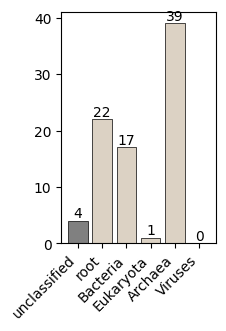

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2, 3))
obj = plt.bar(values.index, height=values.values, color=['gray'] + ['#DCD2C4'] * 5, linewidth=0.5, edgecolor='black')
plt.bar_label(obj)
plt.xticks(rotation=45, ha='right')
# plt.legend()

plt.savefig('Saline_spring_phylum.svg')

### Glacier rich 

In [19]:
import pandas as pd

df = pd.read_csv("../../afesm5/taxonomy/gtdb_lca/Glacier_afesm30_allMem_lca.tsv", header=None,\
                 names=['repId', 'lcaId', 'lcaRank', 'lcaName'], delimiter='\t')

df.head()

,repId,lcaId,lcaRank,lcaName
0,AF-A0A2T1GGD2-F1-model_v4,4036976,genus,Chamaesiphon
1,AF-K9URD6-F1-model_v4,4001169,class,Cyanobacteriia
2,MGYP000193839656,4001169,class,Cyanobacteriia
3,MGYP000229228640,4001169,class,Cyanobacteriia
4,MGYP000267565304,0,no rank,unclassified


In [20]:
def phylum_mapping(x):
  if x in phylum_mapper['taxId'].values:
    if phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0] == 'Cyanobacteriota':
      return 'Cyanobacteriota'
    else:
      return 'others'
    # return phylum_mapper[ phylum_mapper['taxId'] == x]['phylumName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1:
    return 'root'
  else:
    return 'others'
  
# print(phylum_mapper['taxId'].values)
phylum_df = df[ df['lcaRank'] == 'phylum']
df['phylum'] = df['lcaId'].apply(phylum_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum
0,AF-A0A2T1GGD2-F1-model_v4,4036976,genus,Chamaesiphon,Cyanobacteriota
1,AF-K9URD6-F1-model_v4,4001169,class,Cyanobacteriia,Cyanobacteriota
2,MGYP000193839656,4001169,class,Cyanobacteriia,Cyanobacteriota
3,MGYP000229228640,4001169,class,Cyanobacteriia,Cyanobacteriota
4,MGYP000267565304,0,no rank,unclassified,unclassified


In [21]:
def superkingdom_mapping(x):
  if x in superkingdom_mapper['taxId'].values:
    return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
    # return superkingdom_mapper[ superkingdom_mapper['taxId'] == x]['superkingdomName'].values[0]
  elif x == 0:
    return 'unclassified'
  elif x == 1:
    return 'root'
  else:
    return 'others'
  
# print(superkingdom_mapper['taxId'].values)
superkingdom_df = df[ df['lcaRank'] == 'superkingdom']
df['superkingdom'] = df['lcaId'].apply(superkingdom_mapping)
df.head()

,repId,lcaId,lcaRank,lcaName,phylum,superkingdom
0,AF-A0A2T1GGD2-F1-model_v4,4036976,genus,Chamaesiphon,Cyanobacteriota,Bacteria
1,AF-K9URD6-F1-model_v4,4001169,class,Cyanobacteriia,Cyanobacteriota,Bacteria
2,MGYP000193839656,4001169,class,Cyanobacteriia,Cyanobacteriota,Bacteria
3,MGYP000229228640,4001169,class,Cyanobacteriia,Cyanobacteriota,Bacteria
4,MGYP000267565304,0,no rank,unclassified,unclassified,unclassified


In [22]:
values = df['superkingdom'].value_counts()
values

superkingdom
Bacteria        12
unclassified     2
Name: count, dtype: int64

In [23]:
values = values.reindex(['unclassified', 'root',  'Bacteria', 'Eukaryota', 'Archaea', 'Viruses', ])

In [24]:
values = values.fillna(0)

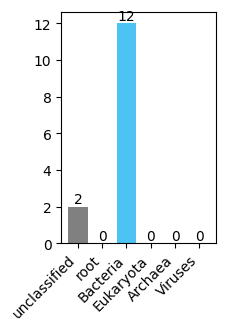

In [25]:
import matplotlib.pyplot as plt


plt.figure(figsize=(2, 3))
obj = plt.bar(values.index, values.values, color=['gray'] + ['#4CC3F2'] * 5)
plt.bar_label(obj)
plt.xticks(rotation=45, ha='right')
# plt.legend()

plt.savefig('Glacier_spring_phylum.svg')